# Ejercicio 4: Algoritmos ML


Las líneas 400 y 500, realizan un proceso de corte de un papel filtrante por ultrasonidos para su posterior incorporación a las líneas 4 y 5 donde se suelda para terminar de ensamblar los filtros.

1.	LOCATION_ID: Identificador único para la localización dentro de las distintas plantas de producción.
2.	Line: Línea de producción (para un mismo producto puede disponerse de varias líneas para aumentar el volumen de producción).
3.	Station: Estación física de trabajo diseñada para realizar uno o varios procesos productivos (una estación puede contar con varios puestos de trabajo). La etiqueta indica un tipo de estación no una unidad física.
4.	Index: Indica el número de estaciones del mismo tipo que hay dentro de la línea. Ej. Línea: 400, Station:20, Index:1,2 (si hay dos estaciones de tipo 20 dentro de la línea 400).
5.	Fu: Function Unit. Separaciones funcionales dentro de la estación e index. Cuando dentro de una estación se realizan dos funciones distintas.
6.	WP: Work Position. Posición donde se pueden realizar uno o más procesos, dentro de una function unit (ej. envasar y estampar).
7.	TP: Tool Position. Posición de la herramienta dentro del WP. Varia cuando tienes varias herramientas involucradas en la misma WP.
8.	RESULT_DATE: Fecha, hora y franja horaria.
9.	UNIQUEPART_ID: **Identificador único** de cada una de las piezas producidas.
10.	Cut Amplitude: Amplitud del corte realizado (micrómetros).
11.	Cut Energy: Energía utilizada en el corte (J).
12.	Cut Frecuency: Frecuencia ultrasonido utilizada para realizar el corte (Hz).
13.	Cut Power: Potencia de corte (W).
14.	Cut WeldTime: Tiempo necesario para realizar el corte del papel (ms).
15.	Grammage: Gramaje del papel de lija (g/m2).
16.	Humidity: Humedad del entorno (%).
17.	Temperature: Grados del entorno.
















Importar librerias con las que trabajaremos

In [246]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

Cargar fichero con los datos a utilizar

In [247]:
# Load dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')

Analisis de los datos

In [248]:
# See first 5 rows of dataset
df.head()

,LOCATION_ID,Line,Station,Index,Fu,WP,TP,RESULT_DATE,UNIQUEPART_ID,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
0,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:30,925766000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070131,122.0,320.0,20081.0,3522.0,383.0,0.0,35.56017,23.40465
1,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:35,066370000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070135,102.0,320.0,20078.0,2730.0,283.0,0.0,35.52355,23.44279
2,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:41,316380000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070141,123.0,320.0,20106.0,3315.0,274.0,0.0,35.52660,23.41533
3,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:47,582042000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070147,107.0,320.0,20080.0,2844.0,280.0,0.0,35.48082,23.39702
4,00000000040000200001400210001,400,20,1,4,21,1,"27/01/23 07:01:53,865001000 EUROPE/BERLIN",L4_2004533475_FU4_230127_070154,101.0,320.0,20078.0,2763.0,285.0,0.0,35.46556,23.41228


In [249]:
# See basic stats for numerical columns
df.describe()

,Line,Station,Index,Fu,WP,TP,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
count,16076.000000,16076.0,16076.0,16076.000000,16076.0,16076.0,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000,16076.000000
mean,475.161732,20.0,1.0,3.170814,21.0,1.0,111.260761,332.841192,20032.532657,2506.980592,329.596479,407.585581,35.040988,22.461128
std,43.208835,0.0,0.0,0.985334,0.0,0.0,9.251505,22.414825,43.351907,1051.830733,49.945660,210.529409,1.338493,0.288926
min,400.000000,20.0,1.0,2.000000,21.0,1.0,81.000000,280.000000,19972.000000,13.000000,201.000000,0.000000,30.030210,21.810050
25%,500.000000,20.0,1.0,2.000000,21.0,1.0,104.000000,320.000000,20000.000000,1698.000000,286.000000,491.710400,34.290600,22.263250
50%,500.000000,20.0,1.0,4.000000,21.0,1.0,111.000000,330.000000,20020.000000,2634.000000,345.000000,510.643400,34.708700,22.446360
75%,500.000000,20.0,1.0,4.000000,21.0,1.0,119.000000,350.000000,20058.000000,3358.000000,364.000000,520.948300,35.352640,22.609640
max,500.000000,20.0,1.0,4.000000,21.0,1.0,131.000000,390.000000,20190.000000,4466.000000,499.000000,666.406500,40.534680,23.500780


In [250]:
# Plot correlation between numerical columns
cols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
df[cols].corr()

,Cut Amplitude,Cut Energy,Cut Frequency,Cut Power,Cut WeldTime,Grammage,Humidity,Temperature
Cut Amplitude,1.000000,-0.088484,0.411653,0.899703,0.158348,-0.139214,0.119788,0.133060
Cut Energy,-0.088484,1.000000,-0.051025,-0.216703,0.708144,0.355684,-0.125524,0.101788
Cut Frequency,0.411653,-0.051025,1.000000,0.412032,0.104043,-0.539887,0.476386,0.347690
Cut Power,0.899703,-0.216703,0.412032,1.000000,0.076624,-0.043887,0.062471,0.089603
Cut WeldTime,0.158348,0.708144,0.104043,0.076624,1.000000,0.063371,0.046564,0.114621
Grammage,-0.139214,0.355684,-0.539887,-0.043887,0.063371,1.000000,-0.622789,-0.225381
Humidity,0.119788,-0.125524,0.476386,0.062471,0.046564,-0.622789,1.000000,0.013942
Temperature,0.133060,0.101788,0.347690,0.089603,0.114621,-0.225381,0.013942,1.000000


<Axes: xlabel='Cut Amplitude', ylabel='Cut Power'>

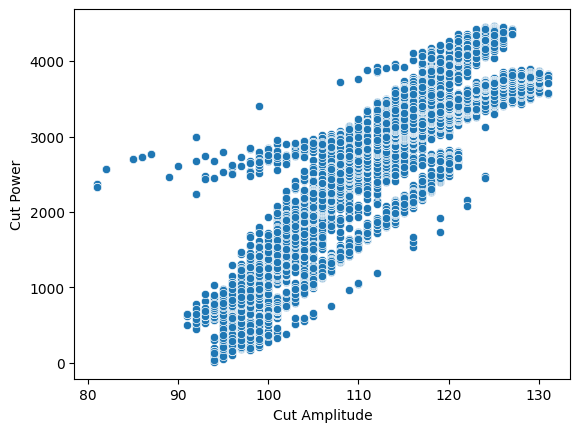

In [251]:
sns.scatterplot(data=df, x='Cut Amplitude', y='Cut Power')

<Axes: xlabel='Grammage', ylabel='Cut Power'>

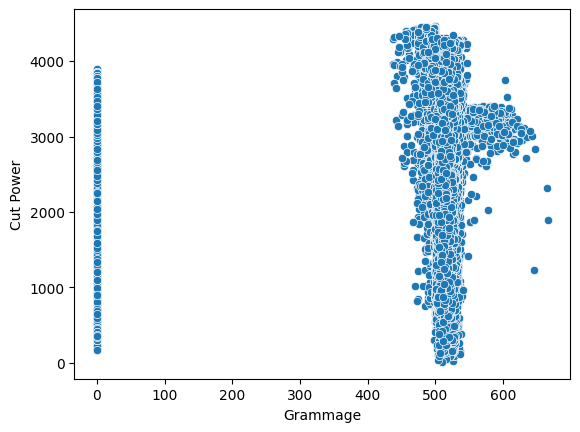

In [252]:
sns.scatterplot(data=df, x='Grammage', y='Cut Power')

<Axes: xlabel='Cut Energy', ylabel='Cut WeldTime'>

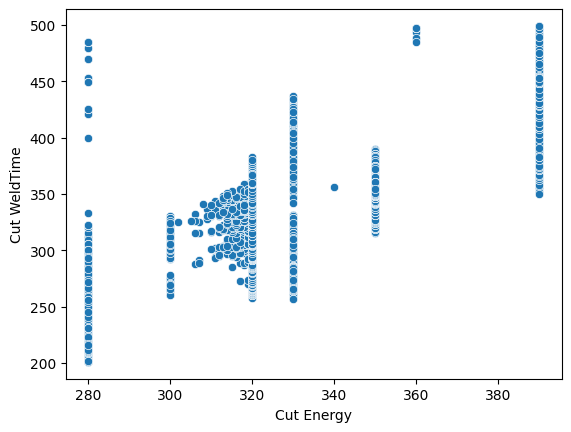

In [253]:
sns.scatterplot(data=df, x='Cut Energy', y='Cut WeldTime')

In [254]:
df = df.loc[df['Grammage'] != 0]

### CLASIFICACION

In [255]:
cols = ['Cut Amplitude', 'Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Grammage','Humidity','Temperature']
x = df[cols]
y = df['Line']

In [256]:
scaler = preprocessing.MinMaxScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.39583333, 1.        , 0.81192661, ..., 0.67274899, 0.54938519,
        0.97635619],
       [0.54166667, 1.        , 0.85321101, ..., 0.58151285, 0.55190915,
        0.97930683],
       [0.8125    , 1.        , 0.98165138, ..., 0.50386276, 0.55159378,
        1.        ],
       ...,
       [0.77083333, 0.45454545, 0.30733945, ..., 0.39038365, 0.34806004,
        0.39901344],
       [0.875     , 0.45454545, 0.39908257, ..., 0.39011716, 0.35121576,
        0.40985395],
       [0.66666667, 0.45454545, 0.27981651, ..., 0.38026105, 0.35500221,
        0.39901344]])

In [257]:
y

3370     400
3371     400
3372     400
3373     400
3374     400
        ... 
16071    500
16072    500
16073    500
16074    500
16075    500
Name: Line, Length: 12706, dtype: int64

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=7,shuffle=True)

In [259]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [260]:
y_pred = clf.predict(x_test)
y_pred 

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)

In [261]:
y_test

15527    500
8979     500
6258     500
13399    500
12458    500
        ... 
3370     400
10431    500
9470     500
7235     500
4527     500
Name: Line, Length: 3177, dtype: int64

<Axes: >

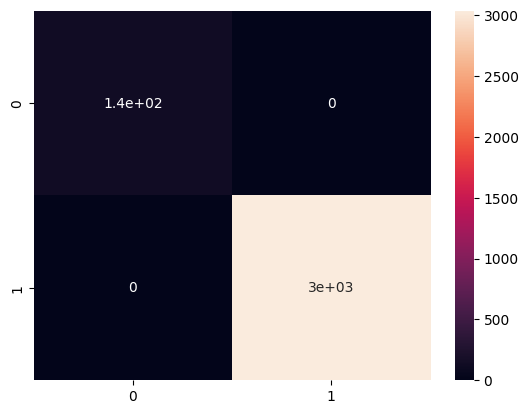

In [262]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

1.0

In [264]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,pos_label=400)

1.0

### REGRESION

<Axes: ylabel='Grammage'>

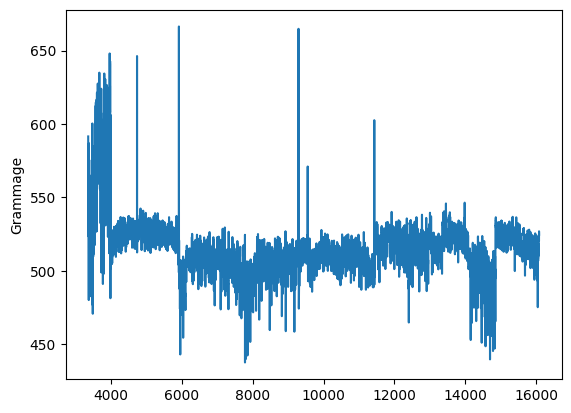

In [265]:
sns.lineplot(data=df['Grammage'])

<Axes: ylabel='Grammage'>

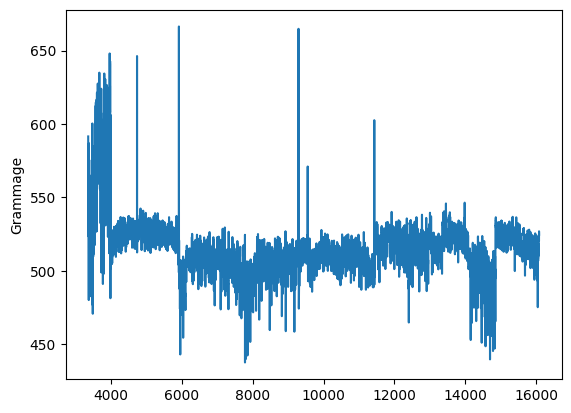

In [266]:
dfGrammage = df.loc[df['Grammage'] != 0]
sns.lineplot(data=dfGrammage['Grammage'])

In [267]:
c = ['Line','Cut Amplitude','Cut Energy','Cut Frequency','Cut Power','Cut WeldTime','Humidity','Temperature','Grammage']
dfClean = dfGrammage[c]
scaler = preprocessing.MinMaxScaler().fit(dfClean)
df_scaled = scaler.transform(dfClean)
df_scaled

array([[0.        , 0.39583333, 1.        , ..., 0.54938519, 0.97635619,
        0.67274899],
       [0.        , 0.54166667, 1.        , ..., 0.55190915, 0.97930683,
        0.58151285],
       [0.        , 0.8125    , 1.        , ..., 0.55159378, 1.        ,
        0.50386276],
       ...,
       [1.        , 0.77083333, 0.45454545, ..., 0.34806004, 0.39901344,
        0.39038365],
       [1.        , 0.875     , 0.45454545, ..., 0.35121576, 0.40985395,
        0.39011716],
       [1.        , 0.66666667, 0.45454545, ..., 0.35500221, 0.39901344,
        0.38026105]])

In [268]:
x = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [269]:
y

array([0.67274899, 0.58151285, 0.50386276, ..., 0.39038365, 0.39011716,
       0.38026105])

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [271]:
regr = svm.SVR()
regr.fit(x_train, y_train)

SVR()

In [272]:
y_pred = regr.predict(x_test)
y_pred 

array([0.36387736, 0.38462586, 0.34633295, ..., 0.35512577, 0.36004404,
       0.37054316])

In [273]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5369666771141686

In [274]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.04107761675909496

In [275]:
mean_squared_error(y_test, y_pred)

0.0026843818850970855

In [276]:
my_pd=pd.DataFrame(data=[y_test,y_pred]).T
my_pd.columns=['y','y_pred']
my_pd = my_pd.sort_values(by=['y_pred'])
my_pd= my_pd.reset_index(drop=True)
my_pd

,y,y_pred
0,0.258524,0.163016
1,0.201518,0.163704
2,0.232419,0.164224
3,0.259856,0.164898
4,0.258524,0.165062
...,...,...
3172,0.862547,0.679351
3173,0.753197,0.745439
3174,0.633325,0.747129
3175,0.713106,0.772472


<Axes: ylabel='y_pred'>

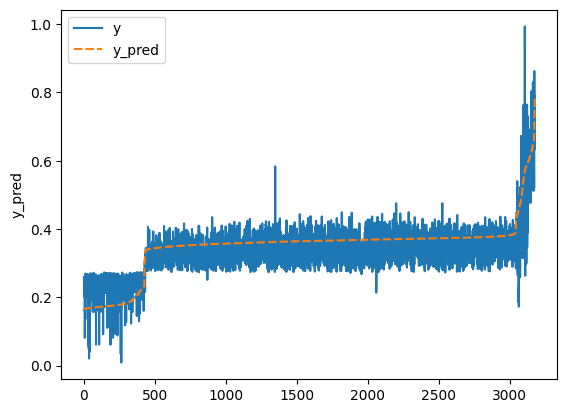

In [277]:
sns.lineplot(data=my_pd['y_pred'])
sns.lineplot(data=my_pd)

# Contenido mínimo : 


1. Utiliza uno o dos metodos de seleccion de variables para evaluarlas y descartar alguna variable en caso de considerarse conveniente.  
1. Utiliza otro metodo de clasificación para identificar a que linea pertenecen los datos.
2. Utiliza otro metodo de regresión para predecir el gramage del papel filtrante.
1. Añade y explica 2 metricas para evaluar el resultado de los modelos generados (2 para el clasificador y 2 para el regresor).

# Ultimos 2 puntos: 


1.   Utiliza un algoritmo complejo (ej. Random Forest, NN...) y realiza un proceso de ajuste de los parametros para un problema de regresión por el cual queremos estimar el valor de la frecuencia de corte. Justifica al ajuste de parametros realizado.









<br>
<br>
<br>
<h1 style = "text-align:center">MANTENIMIENTO INDUSTRIAL AVANZADO</h1>

<a href="https://github.com/ricardordf">

  <iframe src="https://drive.google.com/file/d/1ziQHTw9DWpDT1feRfcPhYUl24TYNEXQI/preview" width="135" height="135" allow="autoplay" style="float:left; vertical-alig:middle"></iframe>
  <iframe src="https://drive.google.com/file/d/1B6NtQfzZTgPuVoFWOl1T0i914jAqpHKC/preview" alt="UE" width="135" height="135" style="float:right;vertical-alig:middle"></iframe>
</a>

<a href="https://github.com/ricardordf/IA_visual">
  <br>
  <h2 style = "text-align:center">Actividad. Inteligencia Artificial</h2>
  <br><br><br>
</a>


<h2> 1. Utiliza uno o dos metodos de seleccion de variables para evaluarlas y descartar alguna variable en caso de considerarse conveniente.</h2>

<div style="text-align: justify">En este apartado se hará uso de 3 métodos de selección de variables. Estos servirán para evaluar y descartar características del conjunto de datos, si es necesario. Realizar esta selección ayuda a mejorar la precisión de los modelos y a reducir su complejidad al eliminar variables irrelevantes o redundantes.

Los métodos empleados en este apartado se han extraído de: https://scikit-learn.org/stable/modules/feature_selection.html

<h4>Método 1: Selección univariada con SelectPercentile


<div style="text-align: justify">El método de Select Percentile es una técnica de selección de características que selecciona un porcentaje específico de las mejores características basándose en una prueba estadística. En este caso, se utiliza la prueba ANOVA F (f_classif) para determinar la importancia de cada variable. El porcentaje de características a seleccionar se especifica mediante el parámetro percentile, permitiendo reducir la dimensionalidad del conjunto de datos y reteniendo solo las características más relevantes para la predicción.

In [278]:
# Librerías necesarias para este método
from sklearn.feature_selection import SelectPercentile, f_classif

# Cargar el dataset y definir las columnas
df = pd.read_csv('cleanedData.csv', delimiter=';')
cols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Grammage', 'Humidity', 'Temperature']
x = df[cols]
y = df['Line']

# Realizamos el escalado de los datos (entre 0 y 1)
scaler = preprocessing.MinMaxScaler().fit(x)
x_scaled = scaler.transform(x)

# La parte anterior se reutilizará en el resto de métodos

selector_percentile = SelectPercentile(f_classif, percentile=50) # SelectPercentile
x_new_percentile = selector_percentile.fit_transform(x_scaled, y)
selected_percentile = [cols[i] for i in selector_percentile.get_support(indices=True)]
discarded_percentile = [col for col in cols if col not in selected_percentile]

print("Características seleccionadas (SelectPercentile):", selected_percentile)
print("Características descartadas (SelectPercentile):", discarded_percentile)

Características seleccionadas (SelectPercentile): ['Cut Frequency', 'Grammage', 'Humidity', 'Temperature']
Características descartadas (SelectPercentile): ['Cut Amplitude', 'Cut Energy', 'Cut Power', 'Cut WeldTime']


<div style="text-align: justify">Explicación general del código:

El código carga el dataset y se definen las columnas que se utilizarán como características y la variable objetivo. Luego, se realiza el escalado para que estén en un rango entre 0 y 1. Posteriormente, hacemos uso del método Select Percentile para seleccionar el 50% de las mejores características basadas en la prueba ANOVA F. Finalmente, se identifican y muestran las características seleccionadas y descartadas, proporcionando un conjunto de datos reducido con las variables más relevantes.

<div style="text-align: justify">Parámetros del método SelectPercentile:

- f_classif: Define la función de puntuación que se usará para evaluar la importancia de las variables. Es la encargada de aplicar el test ANOVA F-Value para la clasificación, evaluando la relación entre cada característica y la variable objetivo.
- percentile=50: Establece el porcentaje de características a seleccionar. En este caso, se seleccionarán el 50% de las características más importantes según las puntuaciones obtenidas de la función f_classif.

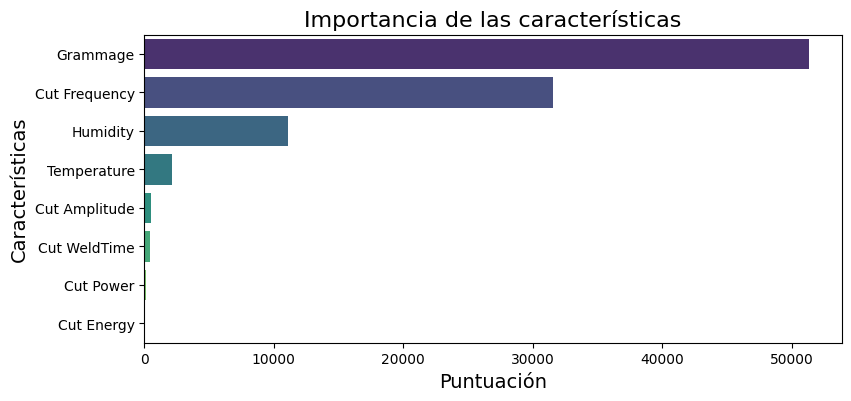

In [279]:
# Gráfica del resultado de la importancia de las características
feature_scores = pd.DataFrame({'Feature': cols, 'Score': selector_percentile.scores_}).sort_values(by='Score', ascending=False)
plt.figure(figsize=(9, 4))
sns.barplot(x='Score', y='Feature', data=feature_scores, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Importancia de las características', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.show()

El funcionamiento de este método se explica en la web oficial de Sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

<br>
<h4>Método 2: Eliminación recursiva de características con RFE

<div style="text-align: justify">El método RFE es una técnica de selección de características que utiliza un modelo predictivo para eliminar recursivamente las variables menos importantes. En este caso, se utiliza la regresión logística como modelo base. El método selecciona un número especificado de características más relevantes, eliminando iterativamente las menos importantes hasta alcanzar el número deseado.

In [280]:
# Librerías necesarias para este método
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()    # Definimos el modelo (es necesario para el RFE)
rfe = RFE(model, n_features_to_select=5) # RFE
x_new_rfe = rfe.fit_transform(x_scaled, y)
selected_rfe = [cols[i] for i in rfe.get_support(indices=True)]
discarded_rfe = [col for col in cols if col not in selected_rfe]

print("Características seleccionadas (RFE):", selected_rfe)
print("Características descartadas (RFE):", discarded_rfe)

Características seleccionadas (RFE): ['Cut Energy', 'Cut Frequency', 'Cut WeldTime', 'Grammage', 'Humidity']
Características descartadas (RFE): ['Cut Amplitude', 'Cut Power', 'Temperature']


<div style="text-align: justify">Explicación del código:

El código define y ajusta un modelo de regresión logística, necesario para el RFE. Utiliza el método RFE para seleccionar las cinco características más relevantes del conjunto de datos escalado. Luego, identifica y muestra las características seleccionadas y las descartadas, proporcionando un conjunto de datos reducido con las características más importantes según el modelo de regresión logística.

<div style="text-align: justify">Parámetros del método RFE:

- model: Define el modelo base que se usará para evaluar la importancia de las características. El modelo escogido ha sido el "Logistic Regression".
- n_features_to_select=5: Establece el número de características a seleccionar. En este caso, se seleccionarán las 5 más importantes eliminando recursivamente las características menos importantes y reevaluando el modelo hasta que queden 5.

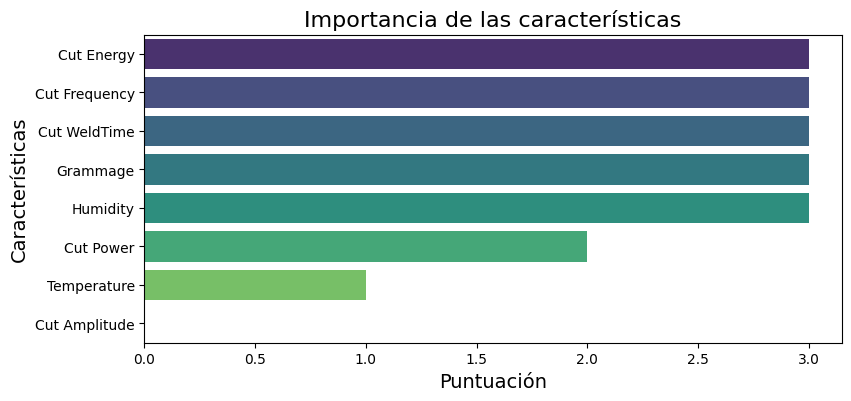

In [281]:
# Gráfica del resultado de la importancia de las características
feature_ranking = pd.DataFrame({'Feature': cols, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')
feature_ranking['Score'] = feature_ranking['Ranking'].apply(lambda x: -x + max(rfe.ranking_))  # Invertir el ranking de manera positiva
plt.figure(figsize=(9, 4))
sns.barplot(x='Score', y='Feature', data=feature_ranking, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Importancia de las características', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.show()

El funcionamiento de este método se explica en la web oficial de Sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

<br>
<h4>Método 3: Selección secuencial de características python


<div style="text-align: justify">El método Sequential Feature Selector es una técnica de selección de características que añade o elimina secuencialmente características a partir de un modelo predictivo, en este caso, volvemos a hacer uso del modelo de regresión logística. El proceso puede realizarse en dos direcciones: hacia adelante (forward), donde se añaden características una por una, o hacia atrás (backward), donde se eliminan características una por una.

In [282]:
# Librerías necesarias para este método
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #Definimos el modelo (es necesario para el RFE)
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward') #SequentialFeatureSelector
sfs.fit(x_scaled, y)
selected_sfs = [cols[i] for i in sfs.get_support(indices=True)]
discarded_sfs = [col for col in cols if col not in selected_sfs]

print("Características seleccionadas (SequentialFeatureSelector):", selected_sfs)
print("Características descartadas (SequentialFeatureSelector):", discarded_sfs)

Características seleccionadas (SequentialFeatureSelector): ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Temperature']
Características descartadas (SequentialFeatureSelector): ['Cut WeldTime', 'Grammage', 'Humidity']


<div style="text-align: justify">Explicación del código:

En el código, se define un modelo de regresión logística necesario para el SFS. Luego, se utiliza el método SFS en dirección hacia adelante para seleccionar las cinco características más relevantes del conjunto de datos escalado. Posteriormente, se identifican y muestran las características seleccionadas y las descartadas, proporcionando un conjunto de datos reducido con las características más importantes según el modelo de regresión logística.

<div style="text-align: justify">Parámetros del método SequentialFeatureSelector:

- model: Define el modelo base que se usará para evaluar la importancia de las características. El modelo escogido ha sido el "Logistic Regression", al igual que el anterior.
- n_features_to_select=5: Establece el número de características a seleccionar. En este caso, se seleccionarán las 5 más importantes.
- direction='forward': Especifica la dirección de la selección de características. 'forward' indica que el selector comenzará con un modelo vacío y añadirá características una por una, evaluando el rendimiento del modelo en cada paso.

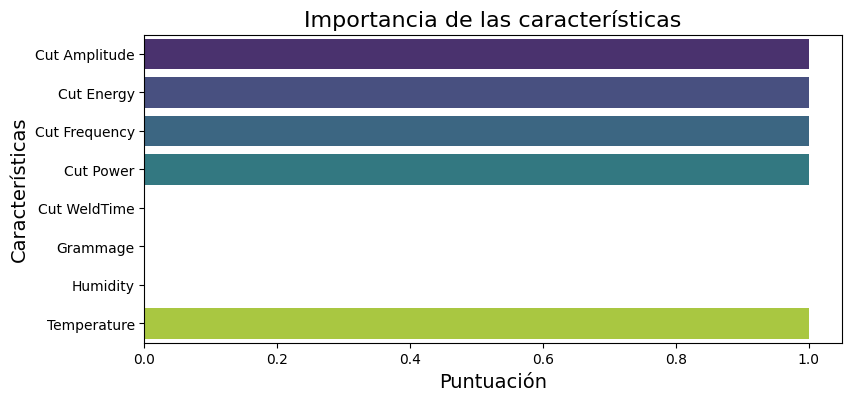

In [283]:
# Gráfica del resultado de la importancia de las características
feature_ranking_sfs = pd.DataFrame({'Feature': cols, 'Selected': sfs.get_support()})
feature_ranking_sfs['Score'] = feature_ranking_sfs['Selected'].apply(lambda x: 1 if x else 0)
plt.figure(figsize=(9, 4))
sns.barplot(x='Score', y='Feature', data=feature_ranking_sfs, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Importancia de las características', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.show()


El funcionamiento de este método se explica en la web oficial de Sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector

<br><div style="text-align: justify">
<h4>Método seleccionado:</h4>
De los tres métodos presentados, recomendaría usar la eliminación recursiva de características (RFE). Este método emplea el modelo completo en cada iteración, eliminando las características menos importantes basadas en su impacto en el modelo, lo que optimiza el rendimiento del modelo. RFE funciona con cualquier modelo que proporcione un atributo de importancia de características, como coeficientes en modelos lineales.
Otra ventaja es que se adapta a diferentes tipos de modelos, lo que lo hace aplicable en diversos contextos.
<br>

<br>
<h2>2. Utiliza otro metodo de clasificación para identificar a que linea pertenecen los datos.

<div style="text-align: justify">En este apartado se utilizará otro método de clasificación para identificar a qué línea pertenecen los datos. El modelo seleccionado es el RandomForestClassifier. Este modelo es un tipo de ensamble que utiliza múltiples árboles de decisión para mejorar la precisión y robustez del modelo final.
El modelo construye una multitud de árboles de decisión durante el entrenamiento y, al finalizar, produce la clase que representa la moda (o el valor más frecuente) de las clases asignadas por los árboles individuales. Una de las principales ventajas de este modelo es su capacidad para manejar grandes conjuntos de datos con numerosas variables de entrada sin necesidad de realizar una selección de características previas como hemos visto antes. Además, el modelo es menos propenso a sobreajustar en comparación con los árboles de decisión individuales, ya que promedia los resultados de múltiples árboles.

In [284]:
# Librerías necesarias para este modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [285]:
# Cargar el dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')
# Seleccionamos las columnas relevantes y realizamos el escalado
cols = ['Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Grammage', 'Humidity', 'Temperature']
x_class = df[cols]
y_class = df['Line']
scaler_class = preprocessing.MinMaxScaler().fit(x_class)
x_scaled_class = scaler_class.transform(x_class)
x_scaled_class

array([[0.82      , 0.36363636, 0.5       , ..., 0.        , 0.52643874,
        0.9431429 ],
       [0.42      , 0.36363636, 0.48623853, ..., 0.        , 0.52295261,
        0.96570121],
       [0.84      , 0.36363636, 0.6146789 , ..., 0.        , 0.52324296,
        0.9494597 ],
       ...,
       [0.74      , 0.45454545, 0.30733945, ..., 0.79060303, 0.32510255,
        0.44945674],
       [0.84      , 0.45454545, 0.39908257, ..., 0.7905115 , 0.32800798,
        0.45938737],
       [0.64      , 0.45454545, 0.27981651, ..., 0.78712603, 0.33149412,
        0.44945674]])

In [286]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_scaled, y_class, test_size=0.25, random_state=7)

In [287]:
# Definir y ajustar el modelo de Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=7)
clf_rf.fit(x_train_class, y_train_class)

RandomForestClassifier(random_state=7)

<div style="text-align: justify">Parámetros del modelo

- n_estimators=100: Define el número de árboles en el bosque. Un valor de 100 proporciona un buen equilibrio entre precisión y tiempo de entrenamiento, asegurando que el modelo tenga suficiente capacidad para capturar las relaciones en los datos.

- random_state=7: Fija la semilla del generador de números aleatorios para asegurar la reproducibilidad de los resultados. Usar random_state=7 garantiza obtener resultados consistentes en cada entrenamiento del modelo.

In [288]:
# Realización de las predicciones
y_pred_class = clf_rf.predict(x_test_class)
y_pred_class

array([500, 500, 500, ..., 500, 500, 500], dtype=int64)

In [314]:
# Métricas para evaluar el modelo
print("\nExactitud:", accuracy_score(y_test_class, y_pred_class))
print("\nInforme de clasificación:\n", classification_report(y_test_class, y_pred_class))


Exactitud: 1.0

Informe de clasificación:
               precision    recall  f1-score   support

         400       1.00      1.00      1.00       970
         500       1.00      1.00      1.00      3049

    accuracy                           1.00      4019
   macro avg       1.00      1.00      1.00      4019
weighted avg       1.00      1.00      1.00      4019



<div style="text-align: justify">El informe anterior muestra cómo de bien ha funcionado el modelo de clasificación.

- precision: Proporción de verdaderos positivos entre los predichos como positivos.
- recall: Proporción de verdaderos positivos entre todos los reales positivos.
- f1-score: Media armónica de precisión y recall, balancea ambas métricas.
- support: Número de ejemplos reales de cada clase en el conjunto de datos.

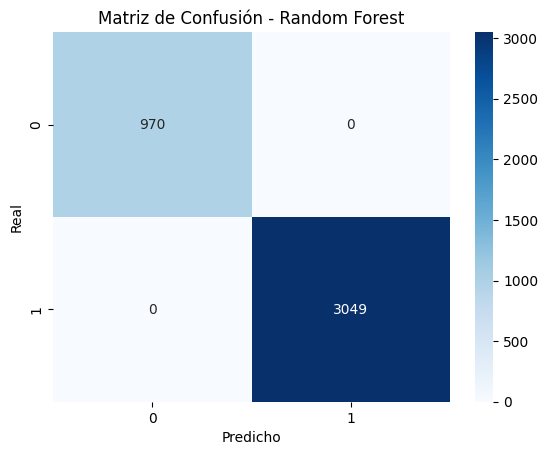

In [315]:
# Visualización de la matriz de confusión
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

<div style="text-align: justify">
La gráfica anterior muestra la matriz de confusión para el modelo que hemos utilizado. En el eje horizontal se encuentran las predicciones del modelo y en el eje vertical los valores reales. La celda superior izquierda (970) indica la cantidad de verdaderos negativos, y la celda inferior derecha (3049) indica la cantidad de verdaderos positivos. Las celdas superiores derecha e inferior izquierda (ambas con valor 0) indican que no hubo falsos positivos ni falsos negativos, lo que sugiere que el modelo clasifica perfectamente en este conjunto de datos.

In [290]:
# Guardamos las predicciones en un nuevo dataframe y las mostramos
predictions = pd.DataFrame({'Real': y_test_class, 'Predicción': y_pred_class})
print("\nPredicciones")
predictions


Predicciones


,Real,Predicción
10904,500,500
8231,500,500
7002,500,500
9017,500,500
11399,500,500
...,...,...
5135,500,500
10692,500,500
10230,500,500
10876,500,500


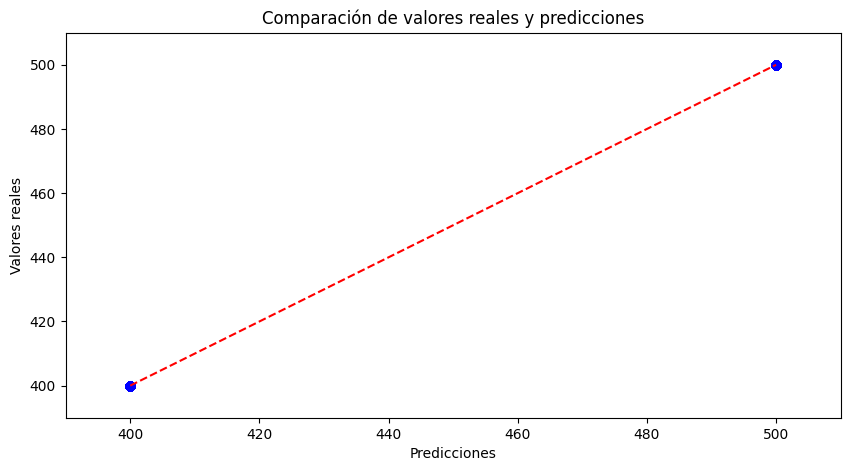

In [317]:
# Gráfica comparativa de valores reales y predicciones
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_class, y_test_class, alpha=0.5, color='blue')
plt.plot([400, 500], [400, 500], color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.ylim(390, 510)
plt.xlim(390, 510)
plt.title('Comparación de valores reales y predicciones')
plt.show()

<div style="text-align: justify">La gráfica de dispersión muestra que las predicciones del modelo coinciden con los valores reales en los puntos (400, 400) y (500, 500). Esto indica que el modelo predice con una precisión del 100% para las dos líneas de trabajo. La línea diagonal roja representa la línea de perfecta predicción, y los puntos en la gráfica caen exactamente sobre esta línea.

El funcionamiento de este clasificador se explica en la web oficial de Sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

<br>

<br>
<h2> 3. Utiliza otro metodo de regresión para predecir el gramage del papel filtrante.

<div style="text-align: justify">En este apartado se utilizará otro método de regresión para predecir el gramage del papel filtrante. El modelo seleccionado es el GradientBoostingRegressor.

Este modelo ensambla múltiples árboles de decisión de manera secuencial. Cada árbol nuevo se construye para corregir los errores residuales de los árboles anteriores, optimizando así la función de pérdida elegida. Esta técnica, conocida como "boosting", permite al modelo capturar patrones complejos y relaciones no lineales en los datos.
Este modelo es muy flexible y permite ajustar parámetros como el número de árboles, la profundidad de cada árbol y la tasa de aprendizaje. Esto facilita encontrar un equilibrio entre el sesgo y la varianza, mejorando la capacidad de generalización del modelo.

Se va a hacer uso del Regresor de Sklearn, pero también existen otra librerías como XGBoost que tienen muy buen funcionamiento.

In [292]:
# Librerías necesarias para este modelo
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [293]:
# Cargar el dataset
df = pd.read_csv("cleanedData.csv",delimiter=';')

# Seleccionamos las columnas relevantes y realizamos el escalado
cols = ['Line', 'Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Humidity', 'Temperature', 'Grammage']
dfGrammage = df.loc[df['Grammage'] != 0]
dfClean = dfGrammage[cols]   
scaler = preprocessing.MinMaxScaler().fit(dfClean)
df_scaled = scaler.transform(dfClean)

# Seleccionamos las características y la etiqueta
x_reg = df_scaled[:, :-1]
y_reg = df_scaled[:, -1]

In [294]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.25, random_state=7)

In [295]:
# Definir el modelo de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7)
gbr.fit(x_train_reg, y_train_reg)

GradientBoostingRegressor(random_state=7)

Parámetros del modelo:
- n_estimators=100: Define el número de árboles a construir en el modelo. Un valor de 100 es una elección común que proporciona un buen equilibrio entre precisión y tiempo de entrenamiento, permitiendo capturar suficientemente las relaciones en los datos.

- learning_rate=0.1: Establece la tasa de aprendizaje, que reduce la contribución de cada árbol individual para evitar sobreajuste. Un valor de 0.1 es una elección estándar que permite un aprendizaje gradual y estable del modelo.

- max_depth=3: Especifica la profundidad máxima de cada árbol individual. Un valor de 3 limita la complejidad de los árboles, ayudando a prevenir el sobreajuste y manteniendo la generalización del modelo.

- random_state=7: Fija la semilla del generador de números aleatorios para asegurar la reproducibilidad de los resultados.

In [296]:
# Realización de las predicciones
y_pred_reg = gbr.predict(x_test_reg)
y_pred_reg

array([0.35204486, 0.35864497, 0.32174964, ..., 0.36047078, 0.31815575,
       0.35997658])

In [297]:
# Métricas para evaluar el modelo
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Error Cuadrático Medio (MSE):", mse)
print("Error Absoluto Medio (MAE):", mae)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.001712051524380979
Error Absoluto Medio (MAE): 0.030376774372347603
Coeficiente de Determinación (R^2): 0.7046854955001282


In [298]:
# Guardamos las predicciones en un nuevo dataframe y las mostramos
predictions = pd.DataFrame({'Real': y_test_reg, 'Predicción': y_pred_reg})
print("\nPredicciones de gramaje del papel filtrante:")
predictions


Predicciones de gramaje del papel filtrante:


,Real,Predicción
0,0.410362,0.352045
1,0.305008,0.358645
2,0.317395,0.321750
3,0.361082,0.360586
4,0.423948,0.352236
...,...,...
3172,0.672749,0.528445
3173,0.344300,0.327374
3174,0.367741,0.360471
3175,0.276372,0.318156


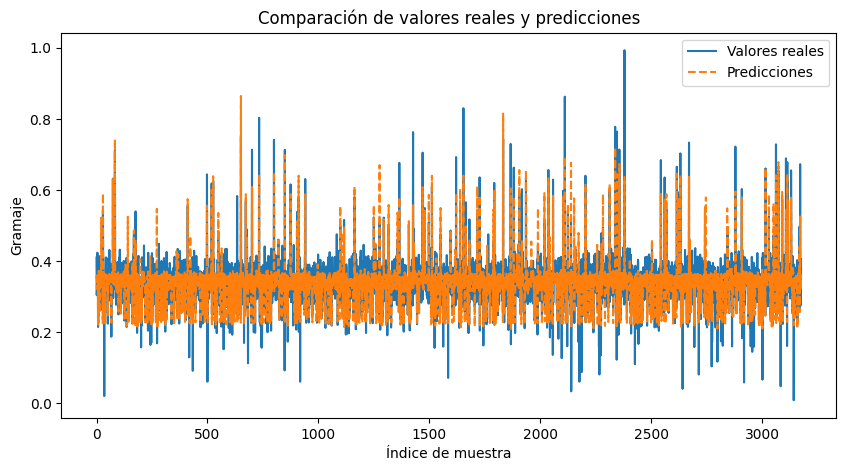

In [299]:
# Gráfica 1 comparativa de valores reales y predicciones
plt.figure(figsize=(10, 5))
plt.plot(y_test_reg, label='Valores reales')
plt.plot(y_pred_reg, label='Predicciones', linestyle='--')
plt.legend()
plt.xlabel('Índice de muestra')
plt.ylabel('Gramaje')
plt.title('Comparación de valores reales y predicciones')
plt.show()

Esta gráfica compara los valores reales y las predicciones de un modelo a lo largo de varias muestras. En el eje horizontal se encuentra el índice de muestra y en el eje vertical el gramaje. La línea azul representa los valores reales, mientras que la línea discontinua naranja representa las predicciones del modelo. La superposición de ambas líneas muestra cómo de cerca están las predicciones del modelo respecto a los valores reales en cada punto de muestra. La divergencia entre las líneas indica discrepancias en el rendimiento del modelo en diferentes momentos.

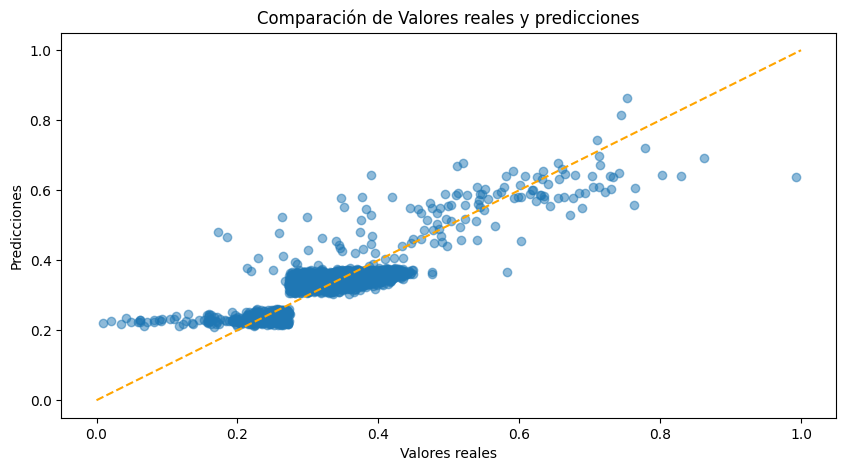

In [300]:
# Gráfica 2 comparativa de valores reales y predicciones
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', color='orange')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores reales y predicciones')
plt.show()



Esta gráfica muestra la comparación entre los valores reales y las predicciones de un modelo. En el eje horizontal se encuentran los valores reales, mientras que en el eje vertical se presentan las predicciones. La línea discontinua naranja representa la línea ideal donde las predicciones serían exactamente iguales a los valores reales. Los puntos azules representan las predicciones del modelo. La dispersión y la desviación de los puntos respecto a la línea ideal sugieren que el modelo no está prediciendo con alta precisión y puede requerir mejoras.
<br>

El funcionamiento de este regresor se explica en la web oficial de Sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#gradientboostingregressor

<br>

<br>
<br>
<h2> 4. Añade y explica 2 metricas para evaluar el resultado de los modelos generados (2 para el clasificador y 2 para el regresor).

<br>
<h4>Para el CLASIFICADOR

In [301]:
# Importamos las métricas necesarias para evaluar el modelo
from sklearn.metrics import roc_auc_score, log_loss

# Necesario para las métricas que evalúan la capacidad del modelo para distinguir entre clases y la certeza de sus predicciones.
# Simulamos probabilidades predichas para el clasificador
y_prob_clf = [0.9 if y_class == 1 else 0.1 for y_class in y_pred_class]  # Suponiendo que los positivos son 1 y los negativos son 0

# Métricas para el clasificador
roc_auc = roc_auc_score(y_test_class, y_prob_clf)
log_loss_value = log_loss(y_test_class, y_prob_clf)

print("Puntuación ROC AUC: ", roc_auc)
print("Pérdida Logarítmica (Log Loss):", log_loss_value)

Puntuación ROC AUC:  0.5
Pérdida Logarítmica (Log Loss): 1.7722770959758491


- ROC AUC Score (Área bajo la curva ROC):
El ROC AUC Score mide la capacidad de un modelo de clasificación para distinguir entre clases positivas y negativas. La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales. El AUC (Área bajo la curva) cuantifica esta capacidad, donde un valor cercano a 1 indica un excelente rendimiento, y un valor de 0.5 sugiere un rendimiento similar al azar.

- Log Loss (Pérdida Logarítmica):
Log Loss evalúa modelos de clasificación probabilística midiendo la incertidumbre de las predicciones. Penaliza predicciones incorrectas con alta confianza más que aquellas con baja confianza. Un menor valor de Log Loss indica que las predicciones del modelo están más cerca de las probabilidades verdaderas, reflejando un mejor rendimiento del modelo.

<br>
<h4>Para el REGRESOR

In [302]:
# Importamos las métricas necesarias para evaluar el modelo
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error

# Métricas para el regresor
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)

print("Error Porcentual Absoluto Medio (MAPE):", mape)
print("Mediana del Error Absoluto (MedAE):", medae)

Error Porcentual Absoluto Medio (MAPE): 0.11343212054143095
Mediana del Error Absoluto (MedAE): 0.025043062358786894


- Error Porcentual Absoluto Medio (MAPE):
El Error Porcentual Absoluto Medio (MAPE) mide la precisión de un modelo de regresión calculando el promedio de los errores porcentuales absolutos entre las predicciones y los valores reales. Un MAPE de 0.113 indica que, en promedio, las predicciones del modelo están un 11.3% lejos de los valores reales. Este resultado sugiere que el modelo tiene una precisión razonable en sus predicciones.

- Mediana del Error Absoluto (MedAE):
La Mediana del Error Absoluto (MedAE) mide la mediana de los errores absolutos entre las predicciones y los valores reales. Un MedAE de 0.025 indica que la mitad de las predicciones del modelo están dentro de un rango de 0.025 unidades de los valores reales. Este resultado sugiere que la mayoría de las predicciones del modelo son bastante precisas.

<br>
<h2> Parte opcional </h2>
<h3> 1. Utiliza un algoritmo complejo (ej. Random Forest, NN...) y realiza un proceso de ajuste de los parametros para un problema de regresión por el cual queremos estimar el valor de la frecuencia de corte. Justifica al ajuste de parametros realizado.

<div style="text-align: justify">
En este apartado se utilizará otro método de regresión para predecir valores continuos en los datos. El modelo seleccionado para esta tarea es el MLPRegressor. Este modelo pertenece a la categoría de redes neuronales artificiales y es parte de la biblioteca de scikit-learn.

El MLPRegressor utiliza una red neuronal de perceptrón multicapa para realizar regresiones. Este modelo puede capturar relaciones no lineales en los datos, lo que lo hace adecuado para problemas complejos donde los modelos lineales tradicionales pueden no ser suficientes. La arquitectura de la red neuronal incluye una o más capas ocultas entre la capa de entrada y la capa de salida. Cada capa oculta contiene un número de neuronas que procesan la información utilizando funciones de activación, como la función ReLU (Rectified Linear Unit).
El MLPRegressor se entrena utilizando el algoritmo de retropropagación, que ajusta los pesos de las conexiones neuronales minimizando el error entre las predicciones del modelo y los valores reales. Este modelo es flexible y puede adaptarse a diferentes configuraciones mediante la elección del número de capas ocultas, el número de neuronas en cada capa, la función de activación y el método de optimización, como el optimizador Adam.

Otra característica importante del MLPRegressor es su capacidad para manejar grandes volúmenes de datos y su robustez frente a ruidos en los datos. Sin embargo, el entrenamiento de redes neuronales puede ser computacionalmente costoso y requiere una cuidadosa selección de hiperparámetros para evitar problemas como el sobreajuste.

In [303]:
# Librerías necesarias para este modelo
from sklearn.neural_network import MLPRegressor

In [304]:
# Cargar el dataset
df = pd.read_csv("cleanedData.csv", delimiter=';')

<Axes: ylabel='Cut Frequency'>

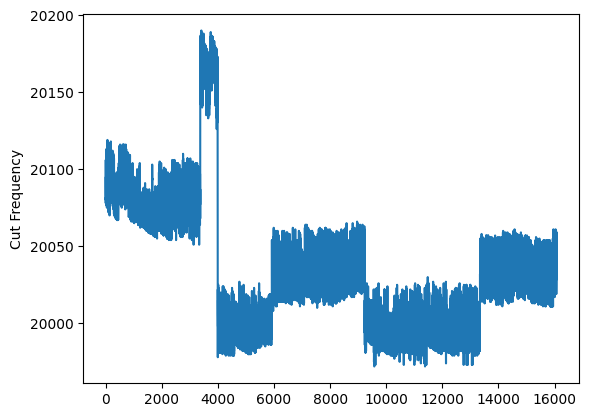

In [305]:
# Gráfica valores de Cut Frequency
sns.lineplot(data=df['Cut Frequency'])

Esta gráfica muestra la frecuencia de corte a lo largo de un conjunto de datos. En el eje horizontal se representan los índices de los datos y en el eje vertical se muestra la frecuencia de corte. La gráfica indica que la frecuencia de corte varía significativamente en diferentes segmentos de los datos, con varias caídas abruptas y cambios en el nivel de frecuencia. Esto sugiere la presencia de diferentes patrones o eventos en los datos a lo largo del tiempo o del índice.

In [306]:
# Seleccionamos las columnas relevantes y realizamos el escalado
cols = ['Line', 'Cut Amplitude', 'Cut Energy', 'Cut Frequency', 'Cut Power', 'Cut WeldTime', 'Humidity', 'Temperature', 'Grammage']
df_clean = df[cols]
scaler = preprocessing.MinMaxScaler().fit(df_clean)
df_scaled = scaler.transform(df_clean)
df_scaled = pd.DataFrame(df_scaled, columns=cols)

# Seleccionamos las características y la etiqueta
x_nn = df_scaled.drop(columns=['Cut Frequency'])
y_nn = df_scaled['Cut Frequency']

In [307]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x_nn, y_nn, test_size=0.2, random_state=42)

In [308]:
# Definir y ajustar el modelo de red neuronal
mlpr = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlpr.fit(x_train_nn, y_train_nn)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

Parámetros del modelo:

- hidden_layer_sizes=(64, 64): Define la arquitectura de la red neuronal con dos capas ocultas, cada una con 64 neuronas, proporcionando un buen equilibrio entre capacidad de aprendizaje y eficiencia computacional.

- activation='relu': Especifica la función de activación usada en las neuronas de las capas ocultas. 'relu' (Rectified Linear Unit) acelera la convergencia del modelo y mitiga problemas de desvanecimiento del gradiente al devolver el valor de entrada si es positivo y cero en caso contrario.

- solver='adam': Define el algoritmo de optimización para ajustar los pesos de la red. 'adam' combina las ventajas de AdaGrad y RMSProp, manejando eficientemente grandes cantidades de datos y parámetros mediante la estimación del primer y segundo momento del gradiente.

- learning_rate_init=0.001: Establece la tasa de aprendizaje inicial, controlando el tamaño de los ajustes en los pesos de la red en cada iteración. Un valor de 0.001 permite un aprendizaje gradual y estable, evitando grandes oscilaciones en la actualización de los pesos.

- max_iter=1000: Define el número máximo de iteraciones del algoritmo de optimización. Permite que la red tenga suficientes oportunidades para ajustar sus pesos y aprender los patrones de los datos, deteniéndose después de 1000 iteraciones si el modelo no converge antes.

- random_state=42: Fija la semilla del generador de números aleatorios para asegurar la reproducibilidad de los resultados, permitiendo obtener resultados consistentes en cada entrenamiento del modelo.

In [309]:
# Realización de las predicciones
y_pred_nn = mlpr.predict(x_test_nn)
y_pred_nn

array([0.11703454, 0.42389924, 0.50332038, ..., 0.0979719 , 0.05945326,
       0.16343622])

In [310]:
# Métricas para evaluar el modelo
mape = mean_absolute_percentage_error(y_test_nn, y_pred_nn)
medae = median_absolute_error(y_test_nn, y_pred_nn)

print("Error Porcentual Absoluto Medio (MAPE):", mape)
print("Mediana del Error Absoluto (MedAE):", medae)

Error Porcentual Absoluto Medio (MAPE): 0.08253070744999287
Mediana del Error Absoluto (MedAE): 0.008002992317387964


In [311]:
# Guardamos las predicciones en un nuevo dataframe y las mostramos
predictions = pd.DataFrame({'Real': y_test_nn, 'Predicción': y_pred_nn})
print("\nPredicciones de Cut Frequency")
predictions


Predicciones de Cut Frequency


,Real,Predicción
9969,0.119266,0.117035
1326,0.426606,0.423899
828,0.500000,0.503320
1398,0.412844,0.416387
1247,0.431193,0.427113
...,...,...
11689,0.077982,0.100702
5436,0.114679,0.125639
9999,0.096330,0.097972
4226,0.059633,0.059453


<div style="text-align: justify">Explicación del código:


El código realiza un análisis y modelado de datos utilizando una red neuronal para predecir la variable 'Cut Frequency' en un conjunto de datos. Primero, se importan las librerías necesarias y se carga el dataset desde un archivo CSV. Luego, se grafica la serie temporal de 'Cut Frequency' utilizando sns.lineplot.

Se seleccionan las columnas relevantes del dataset y se escalan sus valores entre 0 y 1 usando MinMaxScaler. Las características seleccionadas (todas menos 'Cut Frequency') y la etiqueta ('Cut Frequency') se dividen en conjuntos de entrenamiento y prueba en una proporción de 80-20.

Se define un modelo de red neuronal (MLPRegressor) con dos capas ocultas de 64 neuronas cada una, utilizando la función de activación ReLU, el solver Adam, una tasa de aprendizaje inicial de 0.001 y un máximo de 1000 iteraciones. El modelo se ajusta (entrena) con los datos de entrenamiento.

Luego, se realizan predicciones sobre los datos de prueba y se calculan dos métricas de evaluación: el Error Porcentual Absoluto Medio (MAPE) y la Mediana del Error Absoluto (MedAE). Finalmente, se guardan y muestran las predicciones en un nuevo DataFrame, comparando los valores reales con los predichos.

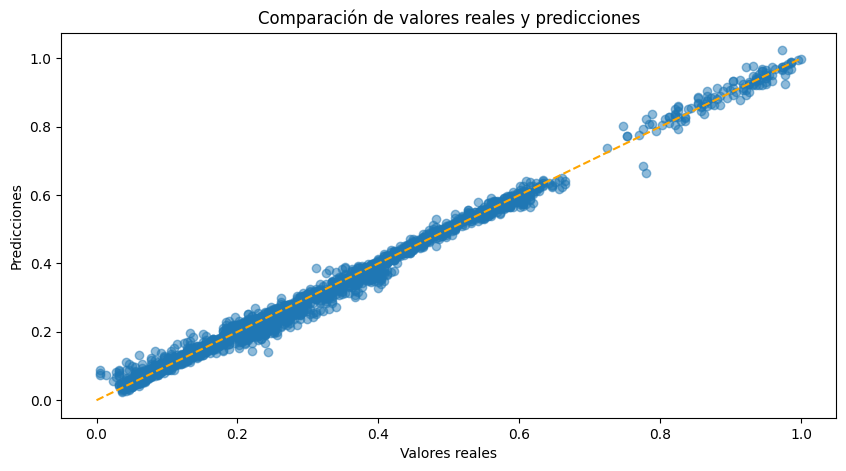

In [312]:
# Gráfica 1 comparativa de valores reales y predicciones
plt.figure(figsize=(10, 5))
plt.scatter(y_test_nn, y_pred_nn, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', color='orange')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales y predicciones')
plt.show()

<div style="text-align: justify">Esta gráfica muestra la comparación entre los valores reales y las predicciones de un modelo. En el eje horizontal se representan los valores reales, mientras que en el eje vertical se representan las predicciones del modelo. La línea discontinua naranja indica la línea ideal donde las predicciones serían exactamente iguales a los valores reales. Los puntos azules representan las predicciones del modelo, mostrando que siguen de cerca la línea ideal, lo que sugiere un buen desempeño del modelo.

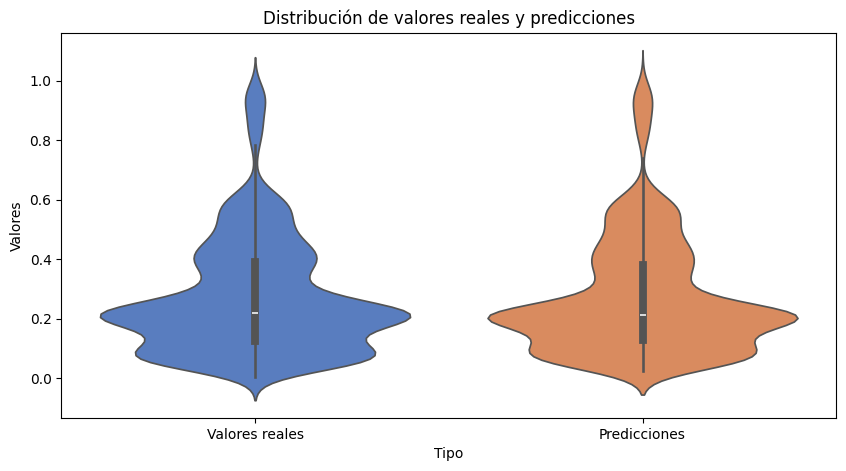

In [313]:
# Gráfica 2 distribución de valores reales y predicciones
df = pd.DataFrame({'Valores reales': y_test_nn, 'Predicciones': y_pred_nn})
df_melted = df.melt(var_name='Tipo', value_name='Valores')
plt.figure(figsize=(10, 5))
sns.violinplot(x='Tipo', y='Valores', hue='Tipo', data=df_melted, palette='muted', legend=False)
plt.title('Distribución de valores reales y predicciones')
plt.show()